In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [44]:
df_comp = merged_df.groupby('Sentiment').agg(
    avg_profit=('Closed_PnL', 'mean'),
    avg_trade_size=('Size_USD', 'mean')
).round(2).reset_index()

print(df_comp.head())


       Sentiment  avg_profit  avg_trade_size
0   Extreme Fear       34.54         5349.73
1  Extreme Greed       67.89         3112.25
2           Fear       54.29         7816.11
3          Greed       42.74         5736.88
4        Neutral       34.31         4782.73


In [45]:
df_comp.tail()


,Sentiment,avg_profit,avg_trade_size
0,Extreme Fear,34.54,5349.73
1,Extreme Greed,67.89,3112.25
2,Fear,54.29,7816.11
3,Greed,42.74,5736.88
4,Neutral,34.31,4782.73


In [46]:
df_comp.head()

,Sentiment,avg_profit,avg_trade_size
0,Extreme Fear,34.54,5349.73
1,Extreme Greed,67.89,3112.25
2,Fear,54.29,7816.11
3,Greed,42.74,5736.88
4,Neutral,34.31,4782.73


In [2]:
# Load Sentiment Dataset
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Load Trader Data
trader_df = pd.read_csv('historical_data.csv')


In [6]:
# 3. Initial Cleaning and Preprocessing
import pandas as pd

# Load the CSV files
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# Preprocess sentiment data
sentiment_df.rename(columns={'classification': 'Sentiment'}, inplace=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Preprocess trader data
trader_df.rename(columns={
    'Closed PnL': 'Closed_PnL',
    'Size USD': 'Size_USD',
    'Timestamp IST': 'Timestamp_IST'
}, inplace=True)
trader_df['Timestamp_IST'] = pd.to_datetime(trader_df['Timestamp_IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = pd.to_datetime(trader_df['Timestamp_IST'].dt.date)

# Merge datasets
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Sentiment']], on='date', how='left')

# Add a flag for profitable trades
merged_df['is_profit'] = merged_df['Closed_PnL'] > 0

# Group by sentiment
performance_by_sentiment = merged_df.groupby('Sentiment').agg(
    avg_pnl=('Closed_PnL', 'mean'),
    avg_trade_size_usd=('Size_USD', 'mean'),
    total_trades=('Closed_PnL', 'count'),
    profit_rate_pct=('is_profit', lambda x: 100 * x.mean())
).round(2).reset_index()

print(performance_by_sentiment.sort_values(by='avg_pnl', ascending=False))


       Sentiment  avg_pnl  avg_trade_size_usd  total_trades  profit_rate_pct
1  Extreme Greed    67.89             3112.25         39992            46.49
2           Fear    54.29             7816.11         61837            42.08
3          Greed    42.74             5736.88         50303            38.48
0   Extreme Fear    34.54             5349.73         21400            37.06
4        Neutral    34.31             4782.73         37686            39.70


In [8]:
# 5. Analysis: PnL and Leverage by Sentiment
# Group by sentiment and calculate average closedPnL and leverage
summary_stats = merged_df.groupby('Sentiment')[['Closed_PnL', 'Size_USD']].mean().round(2)
print(summary_stats)


# Count trades by sentiment
trade_counts = merged_df['Sentiment'].value_counts()
print(trade_counts)


               Closed_PnL  Size_USD
Sentiment                          
Extreme Fear        34.54   5349.73
Extreme Greed       67.89   3112.25
Fear                54.29   7816.11
Greed               42.74   5736.88
Neutral             34.31   4782.73
Sentiment
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [11]:
print(merged_df.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size_USD', 'Side', 'Timestamp_IST', 'Start Position', 'Direction', 'Closed_PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'Sentiment', 'is_profit']


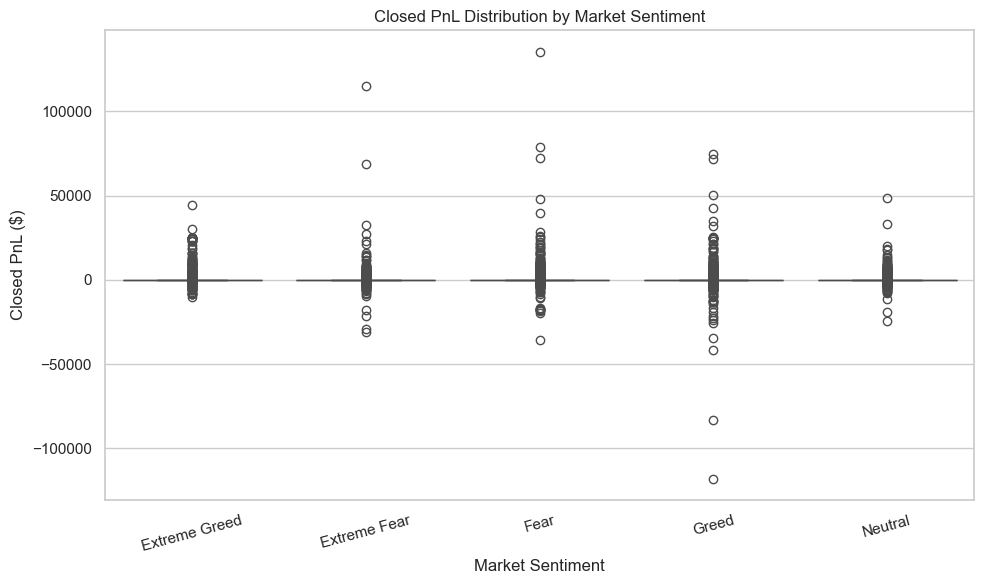

In [16]:
#6. Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed_PnL')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.ylabel('Closed PnL ($)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


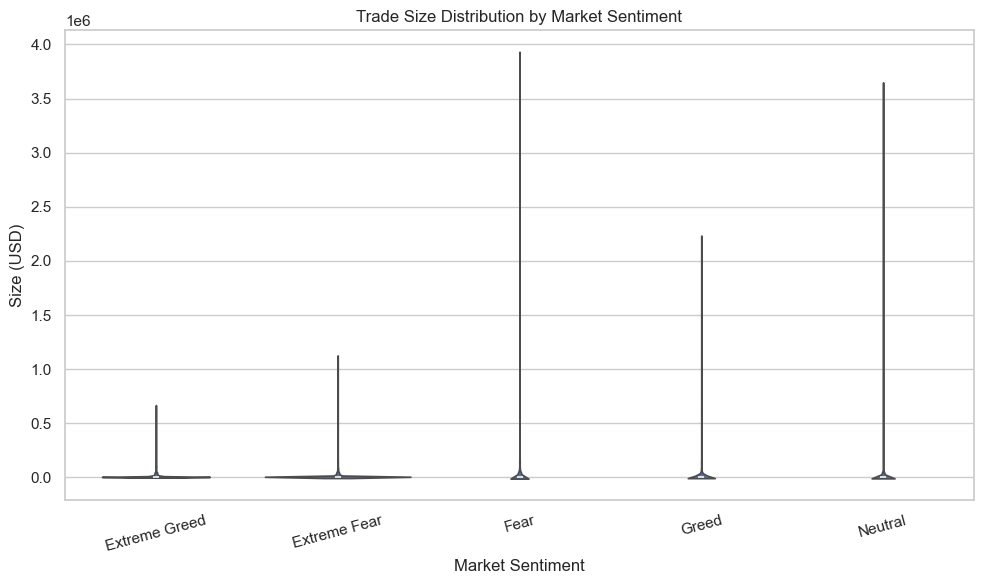

In [21]:
#B. Leverage by Sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Sentiment', y='Size_USD')
plt.title('Trade Size Distribution by Market Sentiment')
plt.ylabel('Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


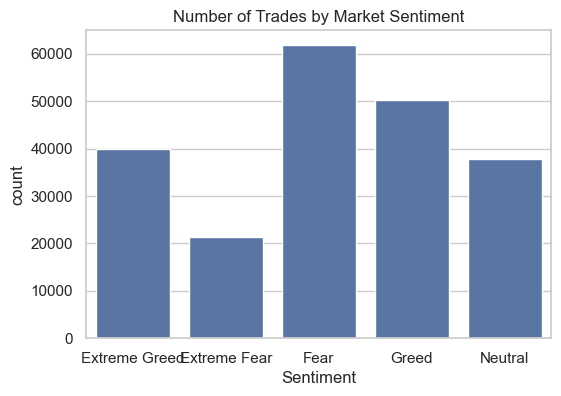

In [23]:
#C. Trade Count by Sentiment
#python
#Copy code
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Sentiment')
plt.title('Number of Trades by Market Sentiment')
plt.show()

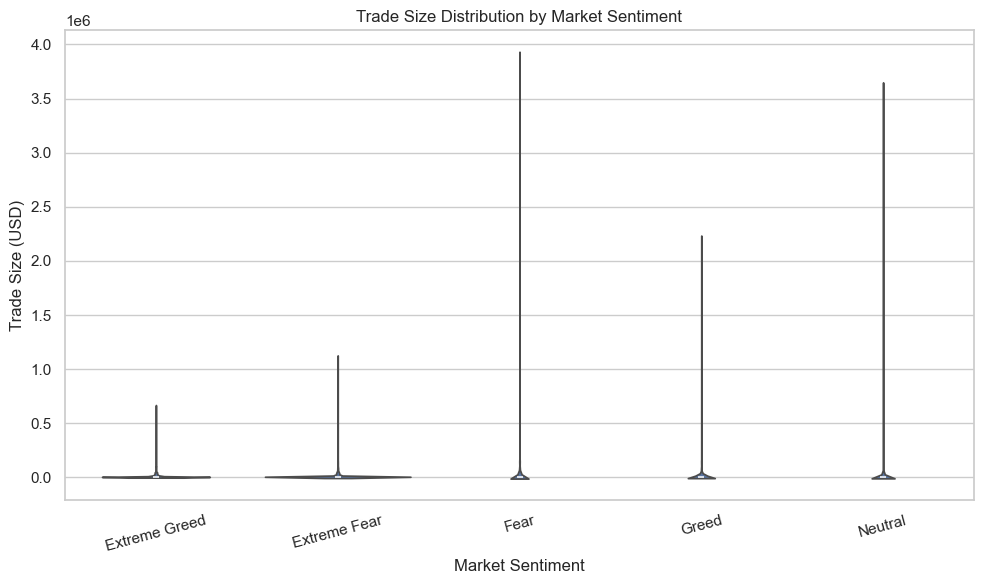

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Sentiment', y='Size_USD')  # Use existing column
plt.title('Trade Size Distribution by Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [26]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size_USD', 'Side',
       'Timestamp_IST', 'Start Position', 'Direction', 'Closed_PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'Sentiment', 'is_profit'],
      dtype='object')


In [28]:
#Profit Rate by Sentiment
# Add profit/loss column
merged_df['is_profit'] = merged_df['Closed_PnL'] > 0  # ✅ correct


# Calculate profit rate
profit_rate = merged_df.groupby('Sentiment')['is_profit'].mean().round(2) * 100
print("Profit Rate (%) by Sentiment:")
print(profit_rate)


Profit Rate (%) by Sentiment:
Sentiment
Extreme Fear     37.0
Extreme Greed    46.0
Fear             42.0
Greed            38.0
Neutral          40.0
Name: is_profit, dtype: float64


In [29]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size_USD', 'Side', 'Timestamp_IST', 'Start Position', 'Direction', 'Closed_PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'Sentiment', 'is_profit']


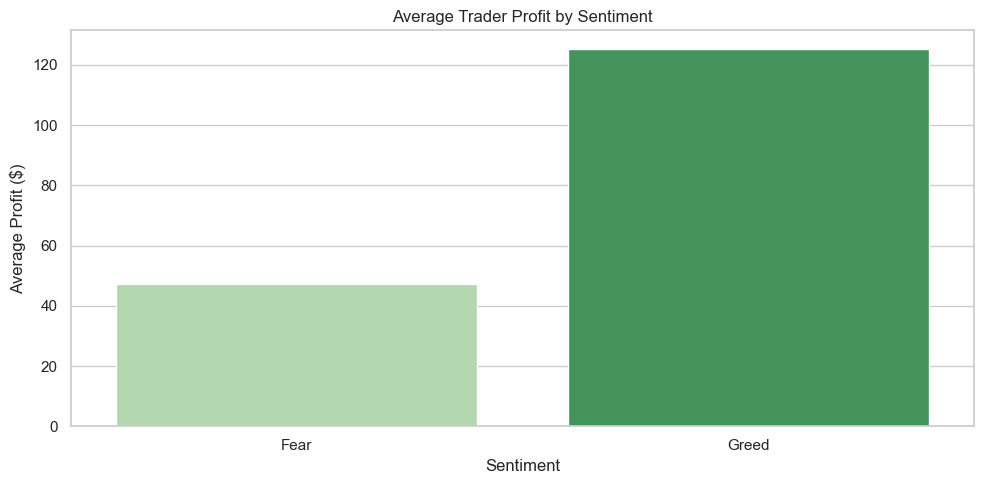

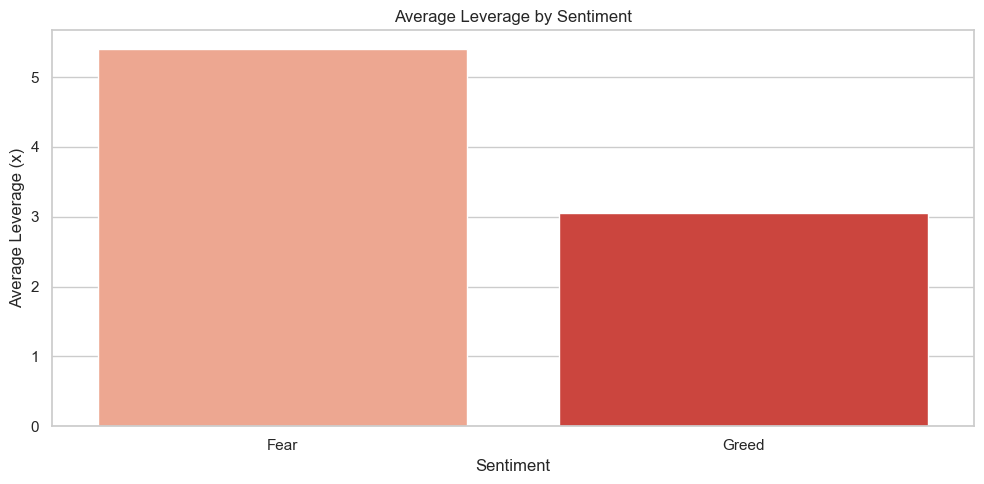

In [32]:

# Bar plot: Average Profit by Sentiment
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='Sentiment', y='avg_profit', hue='Sentiment', palette='Greens', legend=False)
plt.title('Average Trader Profit by Sentiment')
plt.ylabel('Average Profit ($)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

# Bar plot: Average Leverage by Sentiment
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='Sentiment', y='avg_leverage', hue='Sentiment', palette='Reds', legend=False)
plt.title('Average Leverage by Sentiment')
plt.ylabel('Average Leverage (x)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()
